In [1]:
#🔬 Step 1: Install or Import Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
 #🧪 Step 2: Load dataset
df = pd.read_csv("/content/Drugs_admet.csv")

In [8]:
# Peek at the data
print(df.head())

       MW         Vol     Dense  nHA  nHD    TPSA  nRot  nRing  MaxRing  nHet  \
0  586.28  589.792573  0.994044   10    1  114.20     6      7       21    10   
1  114.12  125.769432  0.907375    2    4   52.04     0      1        6     2   
2  273.17  300.870210  0.907933    3    1   40.54     6      2        9     3   
3  130.02  106.916098  1.216094    4    2   65.72     0      1        6     5   
4  393.13  388.123140  1.012900    8    1   95.71     6      4       10     8   

   ...    SR-HSE    SR-MMP    SR-p53  Aggregators   Fluc  Blue_fluorescence  \
0  ...  0.459658  0.986116  0.999984        0.671  0.265              0.998   
1  ...  0.002081  0.108990  0.000410        0.569  0.054              0.164   
2  ...  0.373995  0.094333  0.114721        0.002  0.000              0.383   
3  ...  0.908661  0.001772  0.997286        0.054  0.000              0.011   
4  ...  0.000700  0.267041  0.292062        0.020  0.025              0.590   

   Green_fluorescence  Reactive  Other

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 108 entries, MW to Promiscuous
dtypes: float64(94), int64(14)
memory usage: 81.1 KB
None


In [5]:
# EDA Function
def perform_eda(df):
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nSummary:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

Text(0.5, 1.0, 'Distribution of LogS')

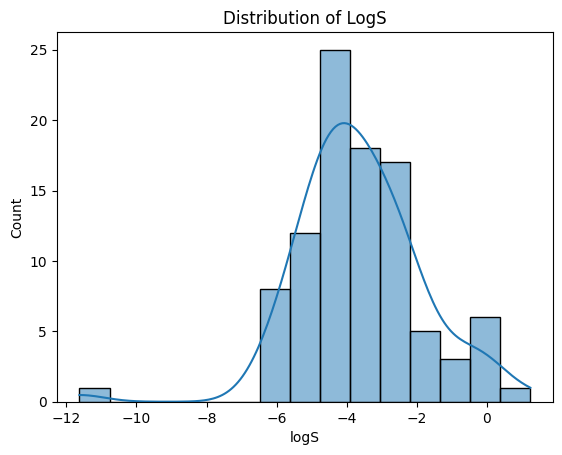

In [12]:
sns.histplot(df['logS'], kde=True)
plt.title("Distribution of logS")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

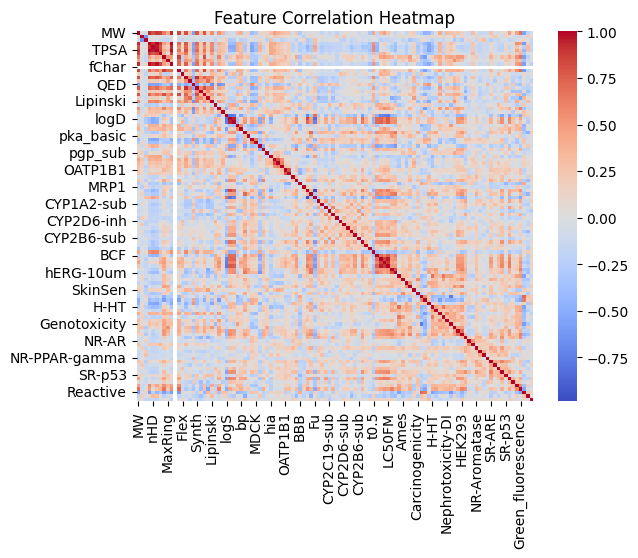

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")

In [23]:
#🧹 Step 3: Data Preprocessing
def preprocess(df):
    df = df.dropna()
    print("\nAfter dropping NA: {} rows, {} columns".format(df.shape[0], df.shape[1]))
    X = df.drop(columns=['logS'])
    y = df['logS']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
#🤖 Step 4: Train Multiple ML Models
def train_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({"Model": name, "MSE": mse, "R2 Score": r2})
        print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")

    results_df = pd.DataFrame(results)
    results_df.to_csv("model_comparison.csv", index=False)
    return results_df

In [25]:
# Main
if __name__ == '__main__':
    import os
    os.makedirs("plots", exist_ok=True)

    filepath = "admet_data.csv"  # Change as needed
    df = load_data(filepath)
    df = df.dropna()  # Remove rows with missing values before EDA
    perform_eda(df)
    X_train, X_test, y_train, y_test = preprocess(df)
    results_df = train_models(X_train, X_test, y_train, y_test)
    print("\nModel comparison saved to 'model_comparison.csv'")


Data Loaded: 96 rows, 108 columns

First 5 rows:
       MW         Vol     Dense  nHA  nHD    TPSA  nRot  nRing  MaxRing  nHet  \
0  586.28  589.792573  0.994044   10    1  114.20     6      7       21    10   
1  114.12  125.769432  0.907375    2    4   52.04     0      1        6     2   
2  273.17  300.870210  0.907933    3    1   40.54     6      2        9     3   
3  130.02  106.916098  1.216094    4    2   65.72     0      1        6     5   
4  393.13  388.123140  1.012900    8    1   95.71     6      4       10     8   

   ...    SR-HSE    SR-MMP    SR-p53  Aggregators   Fluc  Blue_fluorescence  \
0  ...  0.459658  0.986116  0.999984        0.671  0.265              0.998   
1  ...  0.002081  0.108990  0.000410        0.569  0.054              0.164   
2  ...  0.373995  0.094333  0.114721        0.002  0.000              0.383   
3  ...  0.908661  0.001772  0.997286        0.054  0.000              0.011   
4  ...  0.000700  0.267041  0.292062        0.020  0.025             